In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Эта строчка нужна чтобы Pandas отображал все колонки вне зависимости от их количества
pd.set_option('display.max_columns', None)

# Загрузка и обработка данных
Загрузим данные из csv файлов

In [2]:
features = pd.read_csv('resources/features.csv', index_col='match_id')
features_test = pd.read_csv('resources/features_test.csv', index_col='match_id')

# Выберем только те столбцы, которые присутствуют в тестовой выборке
# Т.к. в ней не содержатся признаки, связанные с итогами матча
filtered = features[features_test.columns]

In [3]:
# Посмотрим, что у нас за данные
filtered.describe()

,start_time,lobby_type,r1_hero,r1_level,r1_xp,r1_gold,r1_lh,r1_kills,r1_deaths,r1_items,r2_hero,r2_level,r2_xp,r2_gold,r2_lh,r2_kills,r2_deaths,r2_items,r3_hero,r3_level,r3_xp,r3_gold,r3_lh,r3_kills,r3_deaths,r3_items,r4_hero,r4_level,r4_xp,r4_gold,r4_lh,r4_kills,r4_deaths,r4_items,r5_hero,r5_level,r5_xp,r5_gold,r5_lh,r5_kills,r5_deaths,r5_items,d1_hero,d1_level,d1_xp,d1_gold,d1_lh,d1_kills,d1_deaths,d1_items,d2_hero,d2_level,d2_xp,d2_gold,d2_lh,d2_kills,d2_deaths,d2_items,d3_hero,d3_level,d3_xp,d3_gold,d3_lh,d3_kills,d3_deaths,d3_items,d4_hero,d4_level,d4_xp,d4_gold,d4_lh,d4_kills,d4_deaths,d4_items,d5_hero,d5_level,d5_xp,d5_gold,d5_lh,d5_kills,d5_deaths,d5_items,first_blood_time,first_blood_team,first_blood_player1,first_blood_player2,radiant_bottle_time,radiant_courier_time,radiant_flying_courier_time,radiant_tpscroll_count,radiant_boots_count,radiant_ward_observer_count,radiant_ward_sentry_count,radiant_first_ward_time,dire_bottle_time,dire_courier_time,dire_flying_courier_time,dire_tpscroll_count,dire_boots_count,dire_ward_observer_count,dire_ward_sentry_count,dire_first_ward_time
count,9.723000e+04,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,97230.000000,77677.000000,77677.000000,77677.000000,53243.000000,81539.000000,96538.000000,69751.000000,97230.000000,97230.000000,97230.000000,97230.000000,95394.000000,81087.000000,96554.000000,71132.000000,97230.000000,97230.000000,97230.000000,97230.000000,95404.000000
mean,1.444232e+09,2.630999,51.517104,3.442672,1233.405801,1147.899702,11.231996,0.357009,0.362285,8.271315,52.183452,3.364661,1189.223676,1107.863993,10.471747,0.348709,0.363550,8.275584,52.710491,3.353924,1182.879965,1099.643742,10.333004,0.342723,0.357338,8.273527,52.648092,3.308896,1159.088481,1082.090240,9.981909,0.337746,0.357307,8.275049,52.625630,3.304237,1158.586167,1082.057061,9.995351,0.337262,0.352782,8.288491,51.990106,3.461123,1238.855765,1151.018184,11.253841,0.372262,0.344091,8.296380,52.708547,3.388933,1199.858809,1108.633436,10.460424,0.356238,0.347012,8.310419,52.755137,3.378638,1193.554438,1103.273702,10.386918,0.353533,0.347732,8.305420,52.922421,3.337725,1171.952155,1088.711653,10.035349,0.354952,0.341860,8.319665,53.059694,3.345274,1177.395351,1089.558850,10.053739,0.356063,0.342538,8.323048,97.688029,0.521815,4.593483,4.383224,126.800255,-80.059510,215.987126,2.994775,3.312527,2.431719,0.716250,-6.875747,127.215028,-80.191893,214.870536,2.965566,3.349553,2.448339,0.689119,-6.901922
std,5.515393e+06,2.835761,32.564211,1.111741,566.588895,464.111662,9.041620,0.663889,0.626704,2.497575,32.674077,1.097536,555.363510,458.001007,8.972073,0.654060,0.624236,2.433864,32.560923,1.092126,554.899600,454.727127,8.950871,0.647774,0.618071,2.440139,32.670519,1.092502,550.937530,450.353291,8.917997,0.642908,0.616181,2.427832,32.608231,1.095842,553.020429,453.165214,8.948413,0.643538,0.614965,2.430826,32.442153,1.104905,560.550962,459.111207,9.007098,0.678321,0.609487,2.472106,32.500960,1.088991,551.118181,450.268322,8.889886,0.65938

## Пропуски

Найдем столбцы, в которых присутствуют пропуски

In [4]:
filtered.columns[pd.isnull(filtered).any()].values

array(['first_blood_time', 'first_blood_team', 'first_blood_player1',
       'first_blood_player2', 'radiant_bottle_time',
       'radiant_courier_time', 'radiant_flying_courier_time',
       'radiant_first_ward_time', 'dire_bottle_time', 'dire_courier_time',
       'dire_flying_courier_time', 'dire_first_ward_time'], dtype=object)

**Значения пропусков**:
* `...ward_time` - ни один вард не был установлен за 5 минут матча
* `first_blood_...` - не было события first blood (первое убийство). Если события не произошло, то остальные поля, связанные с ним, также имеют пустое значение. 
* `first_blood_player2` - зачастую first blood просиходит при участии нескольких игроков одной команды (т.к. так проще). Но иногда первое убийство совершается одним героем (например, на "миду"), в этом случае "второго участника" может не быть.
* `...courier_time` - курьер не куплен :( 
* `...flying_courier_time` - курьер не улучшен до летающего :( Даже в профессиональных матчах курьера иногда грейдяд после 5й минуты, но если курьера нет, то и улучшать нечего
* `..._bottle_time` - время покупки предмета Bottle. Его покупают не во всех матчах, скажем, в некоторых ситуация он просто не нужен. 

**Коррекция пропусков**

Заполним пропуски нулями. Это, конечно, не всегда корректно, скажем, для radiant_first_ward_time значение 0 будет означать что вард был поставлен в 0.0 игрового времени. Хотя значение NaN означало что он не был поставлен вообще. Но количество вардов описывает другой признак, поэтому это не должно очень сильно влиять.

In [5]:
filtered = filtered.fillna(0)
filtered_test = features_test.fillna(0)

## Целевая переменная

Значение целевой переменной хранится в столбце `radiant_win` (1, если победила команда Radiant, 0 — иначе). Тем самым имеем место с задачей бинарной классификации.

In [6]:
# Столбец целевой переменной
y_train = features['radiant_win'].values

# Отношение побед radiant к общему числу матчей:
print('Процент побед команды radiant = %.3f' % (len(y_train[y_train==1]) / len(y_train)))

Процент побед команды radiant = 0.519


In [7]:
X_train = filtered.values
X_test = filtered_test.values

# Подход 1: градиентный бустинг "в лоб"

Воспользуемся методом градиентного бустинга. Для определения гиперпарамтеров модели будем использовать GridSearchCV - который позволяет вычислять значение метрики по кросс валидации для каждой сочетания гиперпараметров. 

Выполним поиск параметров классификатора с 5 блоками кросс валидации для количества деревьев градиентного бустнига = [10, 20, 30, 40, 50, 60, 80, 100]. (learning_rate = 0.1). В качестве скоринга площадь под кривой ROC (AUC ROC). 8 вариантов параметра для 5 разбиений, итого надо обучить 40 классификаторов.

*GridSearchCV поддерживает многопоточность, что позволяет быстрее провести обучение и оценку. С версии scikit-learn 0.18.1 в процессе обучения с помощью GridSearchCV также измеряется и время, что также полезно для оценки классификатора.*

In [13]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# Определим функцию для обучения классификатора
def clf_fit_gs(clf, param_grid, X, y):  
    # param_grid - перечень параметров и их значений, среди которых му будем искать лучшую оценку    

    # Подготавливаем кросс валидацию по 5 блокам.
    cross_validator = KFold(n_splits=5, shuffle=True)

    # Для всех параметров пройдем кросс валидацию и обучим классфикатор. В качестве скоринга - ROC AUC
    # n_jobs - количество задач (аля потоков для обучения)
    # verbose=4 - отображение процесса обучения (процесс логируется в консоль ipython)
    gs = GridSearchCV(clf, param_grid, scoring='roc_auc', cv=cross_validator, verbose=4, n_jobs=4)
    _ = gs.fit(X, y)
    return gs

In [14]:
# Опишем, какие параметры мы будем использовать для градиентного бустинга. Мы будем менять количество деревьев от 10 до 100.
estimators = [10, 20, 30, 40, 50, 60, 80, 100]    
    
# Подготовим базовый классификатор
gb_clf = GradientBoostingClassifier(n_estimators=5)

# Обучим классификатор для всех комбинаций параметров
gb_gs = clf_fit_gs(gb_clf, {'n_estimators': estimators}, X_train, y_train)

[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:  2.2min
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:  9.5min finished


Fitting 5 folds for each of 8 candidates, totalling 40 fits


Спустя 10 минуты на средненьком i5 получаем настроенный классификатор и оценку параметров и времени :)
Результаты кросс валидации по всем гиперпараметрам можно получить из словаря `gs.cv_results_`. Проанализируем основные. Построим графики

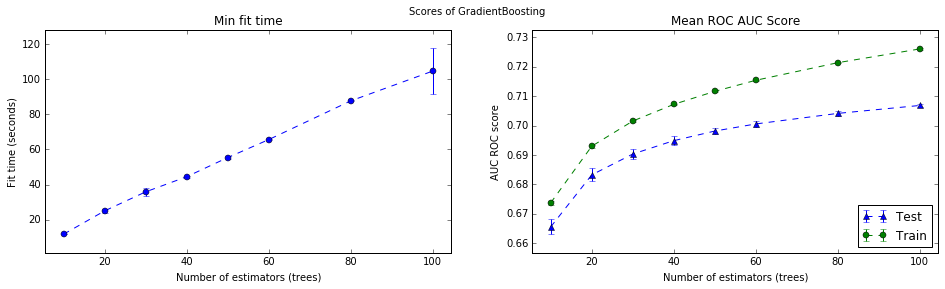

In [15]:
# Функция для построения графиков результатов классификаторов при разных параметрах.
def plot_results(gs, params, title):
    x_axis_name, x_axis_vals  = params
    
    fig = plt.figure(figsize=(16, 4))
    fa=fig.add_subplot(1, 2, 1)
    plt.errorbar(x_axis_vals, gs.cv_results_['mean_fit_time'], gs.cv_results_['std_fit_time'], 
                 linestyle='--', marker='o')
    plt.ylabel('Fit time (seconds)')
    plt.xlabel(x_axis_name)
    fa.set_title('Min fit time')  
    plt.margins(0.05, 0.1)

    fa=fig.add_subplot(1, 2, 2)
    plt.errorbar(x_axis_vals, gs.cv_results_['mean_test_score'], gs.cv_results_['std_test_score'], 
                 linestyle='--', marker='^', label='Test')
    plt.errorbar(x_axis_vals, gs.cv_results_['mean_train_score'], gs.cv_results_['std_train_score'], 
                 linestyle='--', marker='o', label='Train')
    plt.ylabel('AUC ROC score')
    plt.xlabel(x_axis_name)
    fa.set_title('Mean ROC AUC Score')  
    plt.margins(0.05, 0.1)

    handles, labels = fa.get_legend_handles_labels()
    plt.legend(bbox_to_anchor=(1, 0.24))
    fig.suptitle(title)    
    
plot_results(gb_gs, ('Number of estimators (trees)', estimators), 'Scores of GradientBoosting')

Настройка градиентного бустинга с 30 деревьями занимает в среднем 36 секунд. Значение метрики AUC-ROC при этом (n=30) 0.69

In [16]:
print('Среденее время настройки классификатора (n=30): %.3f' % gb_gs.cv_results_['mean_fit_time'][2])
print('Среденее значение AUC-ROC (n=30): %.3f' % gb_gs.cv_results_['mean_test_score'][2])
print('Лучшее значение AUC-ROC: %.3f' % np.max(gb_gs.cv_results_['mean_test_score']))
print('Лучшее значение AUC-ROC при n=%d' % estimators[np.argmax(gb_gs.cv_results_['mean_test_score'])])

Среденее время настройки классификатора (n=30): 35.841
Среденее значение AUC-ROC (n=30): 0.690
Лучшее значение AUC-ROC: 0.707
Лучшее значение AUC-ROC при n=100


Увеличение количества деревьев приведет к увеличению значения метрики AUC-ROC (это хорошо видно по графику), однако следует отметить что разница в качестве на обучающей и на тестовой выборке будет увеличиваться, что сигнализирует о возможном переобучении, т.е. классификатор будет терять обобщающую способность при слишком большом количестве деревьев. 

Для ускорения обучения, можно прибегнуть к обучению на подвыборках (вместо целой выборки), либо ограничить максимальную глубину деревьев (`max_depth`), хотя по умолчанию этот параметр и так задан достаточно малым значением (`max_depth=3`).

# Подход 2: логистическая регрессия

Попробуем применить логистическую регрессию к тем же данным что и в случае с градиентным бустингом.
Для начала применим масштабирование к признакам. 

*Масштабируются в данном случае все признаки (в т.ч. категориальные, чтобы показать что категориальные надо обработать отдельно*

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

## На тех же данных

Обучим модель логистической регрессии подобно обучению модели градиентного бустинга. Возьмем 5 блоков кросс-валидации. Проведем оптимизацию гиперпараметра регуляризации.

[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:   13.9s
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:   43.3s finished


Fitting 5 folds for each of 8 candidates, totalling 40 fits


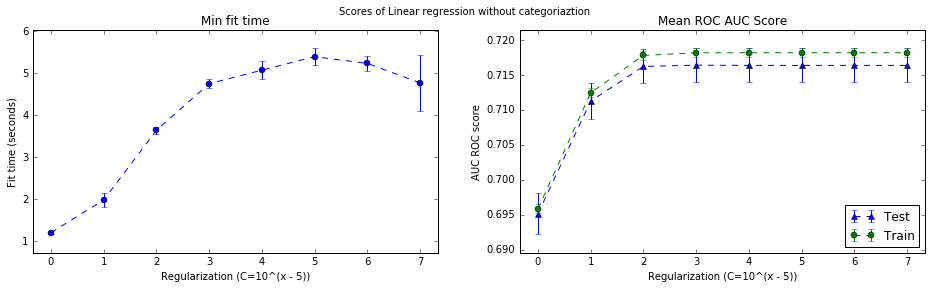

In [18]:
from sklearn.linear_model import LogisticRegression

# Подготовим базовый классификатор
logreg_clf = LogisticRegression()

# Опишем, какие параметры мы будем использовать для классификатора. Мы будем менять параметр регуляризации.
С_values = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0]

# Обучим классификатор для всех параметров
logreg_gs = clf_fit_gs(logreg_clf, {'C': С_values}, X_train_scaled, y_train)

# Построим график:
plot_results(logreg_gs, ('Regularization (C=10^(x - 5))', range(len(С_values))),  'Scores of Linear regression without categoriaztion')

Лучший результат логистической регрессии превосходит результаты градиентного бустинга с большим количеством деревьев (>100). При этом, алгоритм работает гораздо быстрее. Лучшее качество классификации при меньших затратах обусловлено тем, что исходные данные лучше поддаются "мягкому" линейному разделению, причем с одной разделяющей границей (не обязательно параллельной какой-либо из осей) нежели формированию множества разделений пространства (в каждом узле каждого дерева) в случае градиентного бустинга.

In [20]:
print('Лучший AUC-ROC результат: %.4f' % np.max(logreg_gs.cv_results_['mean_test_score']))
print('Худший AUC-ROC результат: %.4f' % np.min(logreg_gs.cv_results_['mean_test_score']))
print('Лучший параметр регуляризации C (для L2 регуляризации): %.2f' % С_values[np.argmax(logreg_gs.cv_results_['mean_test_score'])])

Лучший AUC-ROC результат: 0.7164
Худший AUC-ROC результат: 0.6951
Лучший параметр регуляризации C (для L2 регуляризации): 0.01


## Удаление категориальных признаков

В исзодном датасете есть 11 категориальных признаков: `lobby_type`, `r1_hero`...`r5_hero`, `d1_hero`...`d5_hero`. Обучим модель логистической регрессии на выборке с исключенными столбцами

[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:   12.6s
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:   39.6s finished


Fitting 5 folds for each of 8 candidates, totalling 40 fits


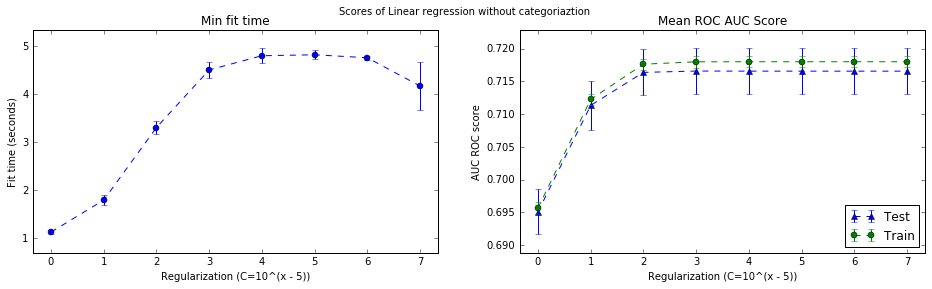

In [21]:
# Составим список столбцов, которые будем исключать
colums_to_drop = ['lobby_type'] + ['r%d_hero' % i for i in range(1,6)] + ['d%d_hero' % i for i in range(1,6)]

scaler = StandardScaler()

# исключим столбцы
X_train_dropped = filtered.drop(colums_to_drop, axis=1).values
X_train_dropped_scaled = scaler.fit_transform(X_train_dropped)

# Подготовим базовый классификатор
logreg_drop_clf = LogisticRegression()

# Обучим классификатор для всех параметров
logreg_drop_gs = clf_fit_gs(logreg_drop_clf, {'C': С_values}, X_train_dropped_scaled, y_train)

# Построим график:
plot_results(logreg_drop_gs, ('Regularization (C=10^(x - 5))', range(len(С_values))),  'Scores of Linear regression without categoriaztion')

In [25]:
print('Лучший AUC-ROC результат: %.4f' % np.max(logreg_drop_gs.cv_results_['mean_test_score']))
print('Худший AUC-ROC результат: %.4f' % np.min(logreg_drop_gs.cv_results_['mean_test_score']))
print('Лучший параметр регуляризации C (для L2 регуляризации): %.2f' % С_values[np.argmax(logreg_drop_gs.cv_results_['mean_test_score'])])

Лучший AUC-ROC результат: 0.7166
Худший AUC-ROC результат: 0.6951
Лучший параметр регуляризации C (для L2 регуляризации): 0.01


Результат изменился не сильно, это говорит о том, что веса при категориальных признаках очень малы. Т.е. категориальные признаки оказались не сильно "значимы" для модели. Действительно, т.к. в тех столбцах записаны идентификаторы объектов, которые нельзя численно сравнивать между собой, то применение к ним линейных моделей не имеет никакого смысла и эти признаки оказывали лишь шумовое воздействие на классификатор.

## "Мешок слов" для кодирования информации о героях.

Представим героев в виде "мешка". Получим разреженную матрицу, где 1 стоит там, где героя взяли radiant, и -1, где герой взят командой dire.

In [55]:
# Функция составляющая "мешок" героев для данных
def bag_of_heroes(X):
    radiant_hero_columns = ['r%d_hero' % i for i in range(1,6)]
    dire_hero_columns = ['d%d_hero' % i for i in range(1,6)]       
    heroes_count = X[radiant_hero_columns + dire_hero_columns].stack().max()
    pick = np.zeros((X.shape[0], heroes_count))
    for i, match_id in enumerate(X.index):
        for p in range(5):
            pick[i, X.ix[match_id, 'r%d_hero' % (p+1)]-1] = 1
            pick[i, X.ix[match_id, 'd%d_hero' % (p+1)]-1] = -1        
    
    return pick

radiant_hero_columns = ['r%d_hero' % i for i in range(1,6)]
dire_hero_columns = ['d%d_hero' % i for i in range(1,6)]   
print('Всего героев: %d' % filtered[radiant_hero_columns + dire_hero_columns].stack().max())
unique_heroes = np.sort(filtered[radiant_hero_columns + dire_hero_columns].stack().unique())
print('В выборке героев: %d' % len(unique_heroes))
print('Неиспользуемые герои: %s' % np.setdiff1d(np.arange(1,113), unique_heroes))

Всего героев: 112
В выборке героев: 108
Неиспользуемые герои: [ 24 107 108 111]


In [23]:
# Объединим датасет с выброшенными колонками и матрицу "мешок" героев
X_bag_heroes = np.hstack((X_train_dropped_scaled, bag_of_heroes(filtered)))

[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:   18.1s
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:  1.3min finished


Fitting 5 folds for each of 8 candidates, totalling 40 fits


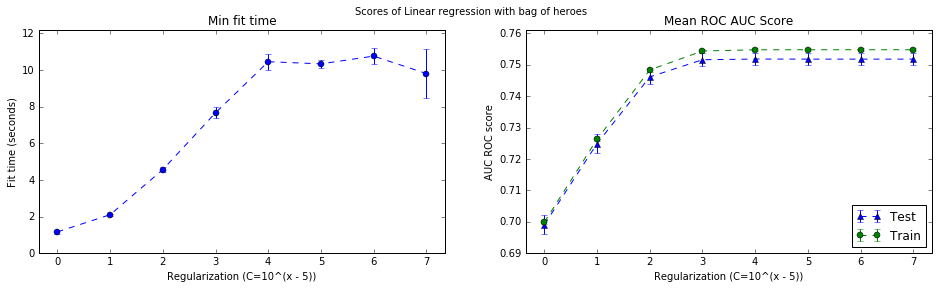

In [24]:
# Подготовим базовый классификатор
logreg_bag_clf = LogisticRegression()

# Обучим классификатор для всех параметров
logreg_bag_gs = clf_fit_gs(logreg_bag_clf, {'C': С_values}, X_bag_heroes, y_train)

# Построим график:
plot_results(logreg_bag_gs, ('Regularization (C=10^(x - 5))', range(len(С_values))),  'Scores of Linear regression with bag of heroes')

In [26]:
print('Лучший AUC-ROC результат: %.4f' % np.max(logreg_bag_gs.cv_results_['mean_test_score']))
print('Худший AUC-ROC результат: %.4f' % np.min(logreg_bag_gs.cv_results_['mean_test_score']))
print('Лучший параметр регуляризации C (для L2 регуляризации): %.2f' % С_values[np.argmax(logreg_bag_gs.cv_results_['mean_test_score'])])

Лучший AUC-ROC результат: 0.7518
Худший AUC-ROC результат: 0.6991
Лучший параметр регуляризации C (для L2 регуляризации): 0.10


Как видно из результатов, с использованием разреженного представления героев предсказания стали точнее (набор героев играет очень важную роль). Обусловлено это тем, что теперь данные категориальные признаки представлены в виде разреженной матрицы а не просто идентификаторами, это упрощает задачу логичитической регрессии, т.к. это линейный метод, а в случае, когда у нас идентификаторы, то не понятно как их сравнивать, что больше, а что меньше, что выливается в невозможность грамотно подобрать весовые коэффициенты.

# Загрузим данные на kaggle
Для этого предскажем значения для тестовой выборки

In [27]:
# Получим лучшую модель
estimator = logreg_bag_gs.best_estimator_

Подготовим данные

In [28]:
test_dropped = filtered_test.drop(colums_to_drop, axis=1)
X_kaggle = test_dropped.values
X_kaggle = scaler.transform(X_kaggle)
X_kaggle = np.hstack((X_kaggle, bag_of_heroes(filtered_test)))

Посчитаем вероятности

In [29]:
y_predicted = estimator.predict_proba(X_kaggle)
y_predicted[:,0]

array([ 0.17606569,  0.24704166,  0.81193603, ...,  0.76550203,
        0.37499065,  0.57394781])

Сохраним результат

In [30]:
result = pd.DataFrame({'radiant_win':y_predicted[:,0]}, index=test_dropped.index)
result.to_csv('kaggle.csv')

Результатом модели стала оценка **0.75529** и мнимое 362-е место (конкурс то прошел уже). *(Результат отправлен 12 марта 2017)*